<a href="https://colab.research.google.com/github/itsbilyatt/data_science_project/blob/main/Spaceship_Titanic_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
## Predict which passengers are transported to an alternate dimension

### Goal
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### About data

In [1]:

# train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
# PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
# HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
# Destination - The planet the passenger will be debarking to.
# Age - The age of the passenger.
# VIP - Whether the passenger has paid for special VIP service during the voyage.
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
# Name - The first and last names of the passenger.
# Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
# test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.


In [2]:
# sample_submission.csv - A submission file in the correct format.
# PassengerId - Id for each passenger in the test set.
# Transported - The target. For each passenger, predict either True or False.

In [3]:
# import required library
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
train_df = pd.read_csv(r'/content/drive/MyDrive/Dataset/space_train.csv')
test_df = pd.read_csv(r'/content/drive/MyDrive/Dataset/space_test.csv')


In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
train_df.shape

(8693, 14)

In [9]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# EDA

In [12]:
# print(train_df['HomePlanet'].unique())
# print(test_df['HomePlanet'].unique())



# ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

# print(train_df['CryoSleep'].unique())
# print(test_df['CryoSleep'].unique())

# print(train_df['Destination'].unique())
# print(test_df['Destination'].unique())

# print(train_df['VIP'].unique())
# print(test_df['VIP'].unique())

# so name ,PassengerId,cabin are not useful in train and test data name ,Transported,cabin coulumns are not important so we can drop it

train_df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)
test_df.drop(['Name','Cabin'],axis=1,inplace=True)




In [13]:
train_df['Age'] = train_df['Age'].fillna(0)
test_df['Age'] = test_df['Age'].fillna(0)
train_df['Age'].isnull().sum()

0

In [14]:
# we can add feature luxury_amneties in dataset for five services RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
five_ser = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
five_ser_test = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
print(f"shape is : {five_ser.shape}")
print("___________________________________________________________")
print(f"null values: {five_ser.isnull().sum()}")
print("___________________________________________________________")
print(five_ser.describe())
print("___________________________________________________________")
five_ser.head()

shape is : (8693, 5)
___________________________________________________________
null values: RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64
___________________________________________________________
        RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count   8512.000000   8510.000000   8485.000000   8510.000000   8505.000000
mean     224.687617    458.077203    173.729169    311.138778    304.854791
std      666.717663   1611.489240    604.696458   1136.705535   1145.717189
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       47.000000     76.000000     27.000000     59.000000     46.000000
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000
_________________________________________________

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [15]:
train_df['luxury_amneties']=five_ser.iloc[::].sum(axis=1)
test_df['luxury_amneties']=five_ser_test.iloc[::].sum(axis=1)

In [16]:
# drop those five columns from dataset
# "[('RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck')] not found in axis" if i use df directally giving error
train_df.drop(list(five_ser.columns),axis=1,inplace=True)
test_df.drop(list(five_ser.columns),axis=1,inplace=True)

In [17]:
print(train_df.head(2))
print("______________________")
print("______________________")
print(test_df.head(2))

  HomePlanet CryoSleep  Destination   Age    VIP  Transported  luxury_amneties
0     Europa     False  TRAPPIST-1e  39.0  False        False              0.0
1      Earth     False  TRAPPIST-1e  24.0  False         True            736.0
______________________
______________________
  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  luxury_amneties
0     0013_01      Earth      True  TRAPPIST-1e  27.0  False              0.0
1     0018_01      Earth     False  TRAPPIST-1e  19.0  False           2832.0


<Axes: xlabel='luxury_amneties'>

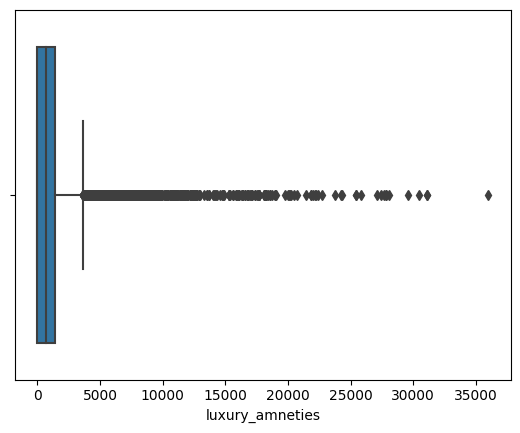

In [18]:
sns.boxplot(x='luxury_amneties',data=train_df)

In [19]:
# first we will divide categorical and numerical variable
def cat_num_divide(df):
  categorical_columns = []
  numerical_columns =[]
  remaining_columns = []
  for columns in df.columns:
    if df[columns].dtype == 'object':
      categorical_columns.append(columns)

    elif df[columns].dtype == 'float64' or df[columns].dtype == 'int':
      numerical_columns.append(columns)
    else:
      remaining_columns.append(f"column name:{columns}==>datatype: {df[columns].dtype}")


  # categorical_columns=f"categorical_columns are :{categorical_columns}"
  # numerical_columns=f"numerical_columns are :{numerical_columns}"
  # remaining_columns=f"remaining_columns are :{remaining_columns}"

  return categorical_columns,numerical_columns,remaining_columns



In [20]:
categorical_columns,numerical_columns,remaining_columns = cat_num_divide(train_df)


In [21]:
# Normalizing numerical variable
from sklearn.preprocessing import StandardScaler
def normalise_num(df,numerical_columns):
  # imported StandardScaler
    sc = StandardScaler()
    # select all numerical columns
    sc.fit(df[numerical_columns])
    # use transform method to transform numerical columns
    df[numerical_columns] = sc.transform(df[numerical_columns])
    return df

train_df = normalise_num(train_df,numerical_columns)
test_df = normalise_num(test_df,numerical_columns)

In [22]:
# categorical data manipulation
from sklearn.preprocessing import LabelEncoder
def categorical_data_conv(df,categorical_columns):
  for col in categorical_columns:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
  return df
train_df = categorical_data_conv(train_df,categorical_columns)
test_df = categorical_data_conv(test_df,categorical_columns)


In [23]:
print(train_df['luxury_amneties'].mean())
print(train_df['luxury_amneties'].median())
train_df['luxury_amneties'].max()
train_df['luxury_amneties'].min()

1.4099691926678624e-17
-0.2586144160862476


-0.5140655447299861

In [24]:
train_df["luxury_amneties"].unique()

array([-0.51406554, -0.25147891,  3.1903326 , ...,  2.62662759,
        2.53136858,  1.14030161])

In [25]:

train_df.shape

(8693, 7)

In [26]:
Q1 = train_df.luxury_amneties.quantile(0.25)
Q3 = train_df.luxury_amneties.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# outliars = train_df[(train_df.luxury_amneties<lower_limit)|(train_df.luxury_amneties>upper_limit)]
# outliars

In [27]:
df_no_outlier = train_df[(train_df.luxury_amneties>lower_limit)&(train_df.luxury_amneties<upper_limit)]
train_df = df_no_outlier

<Axes: >

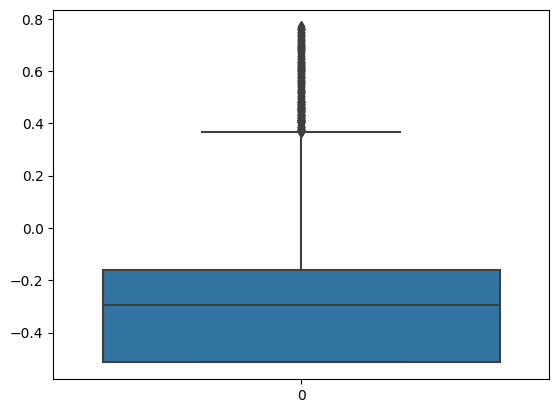

In [28]:
sns.boxplot(train_df.luxury_amneties)

In [29]:
train_df.shape

(7759, 7)

In [30]:
print(train_df.isnull().sum())
print("________________________________________________________")
print(test_df.isnull().sum())


HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
Transported        0
luxury_amneties    0
dtype: int64
________________________________________________________
PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
luxury_amneties    0
dtype: int64


In [31]:
train_df['Transported'].fillna(train_df['Transported'].mode(),inplace=True)

In [32]:
print(train_df.head(2))
print("______________________")
print("______________________")
print(test_df.head(2))

   HomePlanet  CryoSleep  Destination       Age  VIP  Transported  \
0           1          0            2  0.721984    0        False   
1           0          0            2 -0.283969    0         True   

   luxury_amneties  
0        -0.514066  
1        -0.251479  
______________________
______________________
  PassengerId  HomePlanet  CryoSleep  Destination       Age  VIP  \
0     0013_01           0          1            2 -0.071697    0   
1     0018_01           0          0            2 -0.618790    0   

   luxury_amneties  
0        -0.503425  
1         0.502231  


# Model Building

In [33]:
# our target column is Transported and predictors are HomePlanet	CryoSleep	Destination	Age	VIP	luxury_amneties
y=train_df['Transported']
x=train_df.drop("Transported",axis=1)

In [34]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6207, 6) (1552, 6) (6207,) (1552,)


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

print("RSqured value on train:",model.score(x_train,y_train)*100)
print("_"*50)
print("RSqured value on test:",model.score(x_test,y_test)*100)

RSqured value on train: 72.67601095537296
__________________________________________________
RSqured value on test: 74.16237113402062
